In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

In [2]:
# Reads the adjacency matrix from file
A = np.loadtxt('adjacency.txt')
print(f'There are {A.shape[0]} nodes in the graph.')

There are 328 nodes in the graph.


As you can see above, the adjacency matrix is relatively large (328x328): there are 328 persons in the graph. In order to visualize this adjacency matrix, it is convenient to use the 'imshow' function. This plots the 328x328 image where the pixel (i,j) is black if and only if A[i,j]=1.

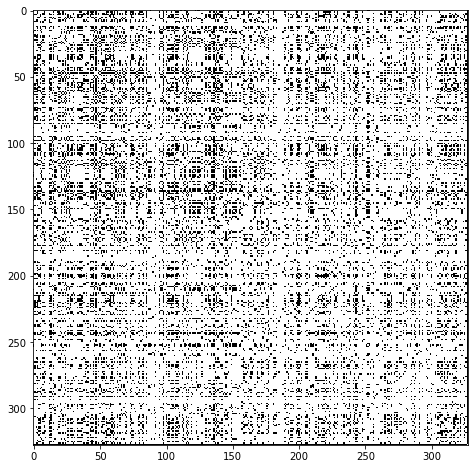

In [3]:
plt.figure(figsize=(8,8))
plt.imshow(A,aspect='equal',cmap='Greys',  interpolation='none')

**(a)** Construct in the cell below the degree matrix:
$$
D_{i,i} = {\rm deg}(i) \qquad \text{and} \qquad D_{i,j} = 0 \ \ \text{if} \ i \neq j,
$$
the Laplacian matrix:
$$
L = D - A
$$
and the normalized Laplacian matrix:
$$
L_{\rm norm} = D^{-1/2} L D^{-1/2}.
$$

In [25]:
# Your answer here
from scipy.linalg import fractional_matrix_power

## Get sum of all rows --> turn row sums into diagonal matrix
row_sums = np.sum(A,axis=1).tolist()
D = np.diag(row_sums)
## Compute L
L = D - A
## Take D ^ -0.5
D_norm = fractional_matrix_power(D, -0.5)
## Compute L_norm
L_norm = D_norm @ L @ D_norm
L_norm

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.01064251],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        , -0.00606998],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -0.01628656, -0.00685914],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        , -0.00680698],
       [ 0.        ,  0.        , -0.01628656, ...,  0.        ,
         1.        , -0.00726126],
       [-0.01064251, -0.00606998, -0.00685914, ..., -0.00680698,
        -0.00726126,  1.        ]])

**(b)** Using the command 'linalg.eigh' from numpy, compute the eigenvalues and the eigenvectors of $L_{\rm norm}$.

In [26]:
# Your answer here
eigenvalues, eigenvectors = np.linalg.eigh(L_norm)
print(eigenvalues)
print(eigenvectors)

[-7.80703533e-17  8.22971080e-02  2.73920284e-01  2.86756239e-01
  4.12340841e-01  4.41921035e-01  6.16054279e-01  6.70249866e-01
  7.06406288e-01  7.25463028e-01  7.35075504e-01  7.52268234e-01
  7.71169767e-01  7.73015222e-01  7.88819638e-01  7.93830094e-01
  8.03472018e-01  8.14921509e-01  8.21827484e-01  8.27206976e-01
  8.35085854e-01  8.38589162e-01  8.46760685e-01  8.56016240e-01
  8.58888980e-01  8.61157975e-01  8.65395654e-01  8.68032309e-01
  8.71228049e-01  8.75612490e-01  8.79472847e-01  8.81071746e-01
  8.83567703e-01  8.85609635e-01  8.87491226e-01  8.90039358e-01
  8.93125892e-01  8.96071979e-01  8.97872008e-01  9.00108767e-01
  9.02215754e-01  9.04086375e-01  9.06058925e-01  9.07454646e-01
  9.09056960e-01  9.09610504e-01  9.13082816e-01  9.13504100e-01
  9.15522027e-01  9.16340436e-01  9.17403135e-01  9.19270844e-01
  9.22130905e-01  9.23161207e-01  9.23511054e-01  9.24832666e-01
  9.28088113e-01  9.29143852e-01  9.30923431e-01  9.32402646e-01
  9.33870511e-01  9.35555

**(c)** We would like to cluster the nodes (i.e. the users) in 3 groups. Using the eigenvectors of $L_{\rm norm}$, assign to each node a point in $\mathbb{R}^2$, exactly as explained in last lecture (also in 'Algorithm 1' of the notes) where you replace $L$ by $L_{\rm norm}$. Plot these points using the 'scatter' function of matplotlib.

<AxesSubplot:xlabel='x', ylabel='y'>

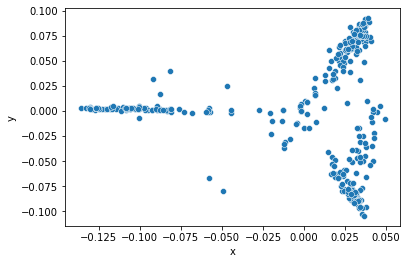

In [27]:
# Your answer here

## Get first 3 eigenvectors
k_eigenv = eigenvectors[:,:3]
k_eigenv.shape

## Associate nodes with vectors 
k_minus_1_eigenv = k_eigenv[:,1:]
k_minus_1_eigenv

## Format Data for plotting
data = pd.DataFrame(k_minus_1_eigenv)
data.columns = ['x', 'y']

sns.scatterplot(data=data, x="x", y="y")

**(d)** Using the K-means algorithm (use the built-in function from scikit-learn), cluster the embeddings in $\mathbb{R}^2$ of the nodes in 3 groups.

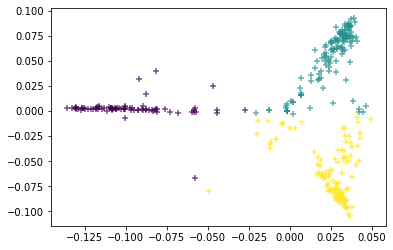

In [28]:
# Replace ??? by the matrix of the points computed in (c)
# Each row corresponds to a data point
kmeans = KMeans(n_clusters=3, random_state=0).fit(k_minus_1_eigenv)
labels=kmeans.labels_
# labels contains the membership of each node 0,1 or 2

data['label'] = labels

# This colors each point of R^2 according to its label
# replace "x/y coordinates" by the coordinates you computed in (c) 
plt.scatter( data['x'], data['y'], alpha=0.7, marker='+', c = labels)

**(e)** Re-order the adjacency matrix according to the clusters computed in the previous question. That is, reorder the columns and rows of $A$ to obtain a new adjacency matrix (that represents of course the same graph) such that the $n_1$ nodes of the first cluster correspond to the first $n_1$ rows/columns, the $n_2$ nodes of the second cluster correspond to the next $n_2$ rows/columns, and the $n_3$ nodes of the third cluster correspond to the last $n_3$ rows/columns.
Plot the reordered adjacency matrix using 'imshow'.

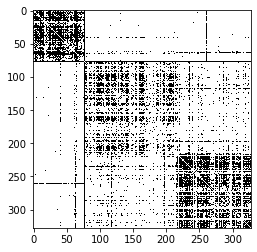

In [29]:
## Your answer here
zero_index = data.index[data['label'] == 0].tolist()
one_index =  data.index[data['label'] == 1].tolist()
two_index =  data.index[data['label'] == 2].tolist()

index_list = zero_index + one_index + two_index

reorder_A = A[index_list]
reorder_A = reorder_A.transpose()
reorder_A = reorder_A[index_list]

plt.imshow(reorder_A,aspect='equal',cmap='Greys',  interpolation='none')